## Source: Climate Change: Earth Surface Temperature Data
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/

Data from 1743 - 2013

In [10]:
!ls ../data

 GlobalLandTemperaturesByCountry.csv
 GlobalTemperatures.csv
 health-nutrition-and-population-statistics.csv
 health-nutrition-and-population-statistics.zip
'NFA 2018.csv'


In [11]:
#flags
%matplotlib inline
%load_ext autoreload
%autoreload 2

#general
import time
import warnings
warnings.filterwarnings('ignore')
# data
import numpy as np
import pandas as pd
import pandas_profiling

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# visualization
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as god9b8
import plotly.tools as tls
import seaborn as sns

#custom
from eda import *

# change display of floats in dataframes
# pd.set_option('display.floa/Users/lukas/Downloads/titanic/train.csvt_format', lambda x: "{0:,.0f}".format(x))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
df = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')

In [13]:
# inspect columns
inspect_columns(df)

number of columns 4
['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']


In [14]:
inspect_rows(df)

number of rows 577462
  0  1743-11-01      4.384    2.294  Åland
---  ------------  -------  -------  -------
  1  1743-12-01        nan      nan  Åland
  2  1744-01-01        nan      nan  Åland
  3  1744-02-01        nan      nan  Åland
  4  1744-03-01        nan      nan  Åland


In [21]:
eda(df)

missing values: dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

dataframe index: RangeIndex(start=0, stop=577462, step=1)

dataframe types: dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

dataframe shape: (577462, 4)

dataframe index: RangeIndex(start=0, stop=577462, step=1)

dataframe describe:        AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.2

In [27]:
# data types
dtypes(df)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object
dt
column type:: <class 'numpy.dtype'>
AverageTemperature
column type:: <class 'numpy.dtype'>
AverageTemperatureUncertainty
column type:: <class 'numpy.dtype'>
Country
column type:: <class 'numpy.dtype'>


In [24]:
t = global_temp_country[global_temp_country.isna().any(axis=1)]
len(t)

NameError: name 'global_temp_country' is not defined

In [29]:
times = pd.unique(global_temp_country['dt'])
times[:20]

array(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
       '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
       '1744-07-01', '1744-08-01', '1744-09-01', '1744-10-01',
       '1744-11-01', '1744-12-01', '1745-01-01', '1745-02-01',
       '1745-03-01', '1745-04-01', '1745-05-01', '1745-06-01'],
      dtype=object)

## ETL

In [30]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [31]:
global_temp_country_nonans = global_temp_country_clear.dropna()
len(global_temp_country_nonans)

526013

In [32]:
global_temp_country_nonans['year'] = global_temp_country_nonans['dt'].str[:4]
global_temp_country_nonans_with_year = global_temp_country_nonans.astype({'year': 'int32'})
np.unique(global_temp_country_nonans_with_year['year'])

array([1743, 1744, 1745, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757,
       1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779,
       1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 18

In [34]:
surface_temp_by_year_and_country = global_temp_country_nonans_with_year.groupby(['year', 'Country'], as_index=False).agg({'AverageTemperature': 'mean', 'AverageTemperatureUncertainty': 'mean'})

In [35]:
len(surface_temp_by_year_and_country)

44334

In [36]:
list(surface_temp_by_year_and_country)

['year', 'Country', 'AverageTemperature', 'AverageTemperatureUncertainty']

In [37]:
year_data = surface_temp_by_year_and_country[surface_temp_by_year_and_country['year'] == 1850]
year_data

,year,Country,AverageTemperature,AverageTemperatureUncertainty
7541,1850,Afghanistan,13.326083,1.961917
7542,1850,Albania,11.734667,1.427667
7543,1850,Algeria,22.587333,1.707583
7544,1850,Andorra,10.651750,1.386083
7545,1850,Anguilla,26.106333,1.130833
7546,1850,Antigua And Barbuda,25.933250,1.122083
7547,1850,Armenia,7.793167,1.702167
7548,1850,Aruba,27.438167,1.197167
7549,1850,Asia,6.586750,0.965250
7550,1850,Austria,5.536667,1.465667


In [38]:
len(year_data)

179

## Graphics

source https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming

#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

In [39]:
#Let's average temperature for each country


In [41]:
def plot_world_map_with_data(countries, data, year):

    data = [ dict(
            type = 'choropleth',
            locations = countries,
            z = data,
            locationmode = 'country names',
            text = countries,
            marker = dict(
                line = dict(color = 'rgb(0,0,0)', width = 1)),
                colorbar = dict(autotick = True, tickprefix = '', 
                title = '# Average\nTemperature,\n°C')
                )
           ]

    layout = dict(
        title = 'Average land temperature in countries ' + str(year),
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = 'rgb(0,255,255)',
            projection = dict(
            type = 'orthographic',
                rotation = dict(
                        lon = 60,
                        lat = 10),
            ),
            lonaxis =  dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                ),
            lataxis = dict(
                    showgrid = True,
                    gridcolor = 'rgb(102, 102, 102)'
                    )
                ),
            )

    fig = dict(data=data, layout=layout)
    py.iplot(fig, validate=False, filename='worldmap')
    


def filter_and_plot(data, year):
    year_data = data[data['year'] == year]
    countries = np.unique(year_data['Country'])
    mean_temp = year_data['AverageTemperature'] 
    plot_world_map_with_data(countries, mean_temp, year)

    
filter_and_plot(surface_temp_by_year_and_country, 1743)

In [42]:
int_range = widgets.IntSlider(
    value=0,
    min=0,
    max=270,
    step=30,
)
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        clear_output(wait=True)
        filter_and_plot(surface_temp_by_year_and_country, 1743+change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0, max=270, step=30)

Output()

In [43]:
play = widgets.Play(
    interval=2000,
    value=0,
    min=0,
    max=100,
    step=10,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])
output = widgets.Output()


display(play, output)

def on_value_change(change):
    with output:
        print(change['new'])
        clear_output(wait=True)
        filter_and_plot(surface_temp_by_year_and_country, 1913+change['new'])

play.observe(on_value_change, names='value')

Play(value=0, description='Press play', interval=2000, step=10)

Output()

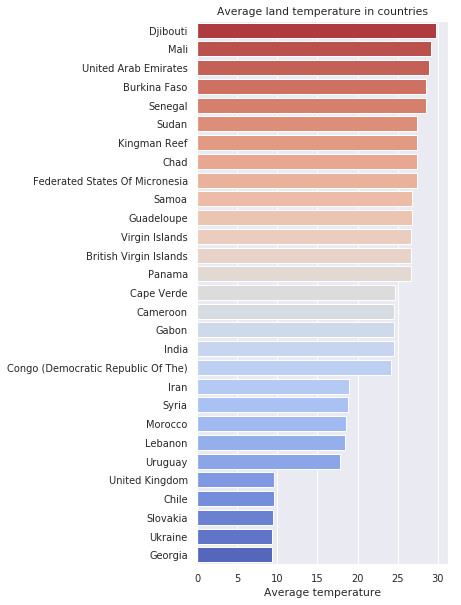

In [44]:
def plot_vertical_bar_chart(data, year):
    year_data = data[data['year'] == year]
    countries = np.unique(year_data['Country'])
    mean_temp = year_data['AverageTemperature']
    
    mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                                 reverse = True)))
    
    property_a = mean_temp_bar
    property_b = countries_bar
    good_indices = [0, 1, 2, 3, 4, 20, 21, 22, 23, 50, 51, 52, 53, 54, 100, 101, 102, 103, 104, 150, 151, 152, 153, 154, 200, 201, 202, 203, 204]
    property_asel = [property_a[i] for i in good_indices]
    property_bsel = [property_b[i] for i in good_indices]
    
    mean_temp_bar = property_asel
    countries_bar = property_bsel
    
    sns.set(font_scale=0.9) 
    f, ax = plt.subplots(figsize=(4.5, 10))
    colors_cw = sns.color_palette('coolwarm', len(countries_bar))
    sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
    Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')
    
plot_vertical_bar_chart(surface_temp_by_year_and_country, 2000)

IntSlider(value=0, max=270, step=30)

Output()

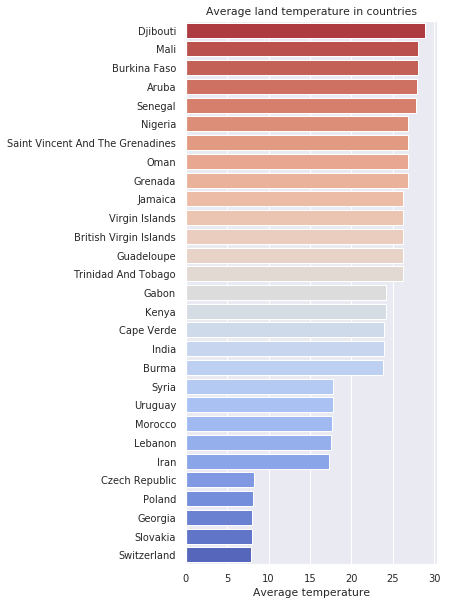

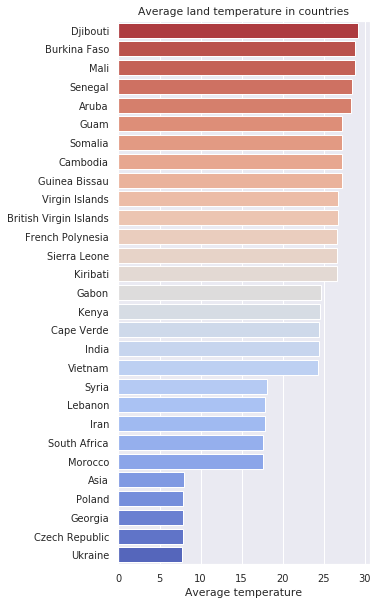

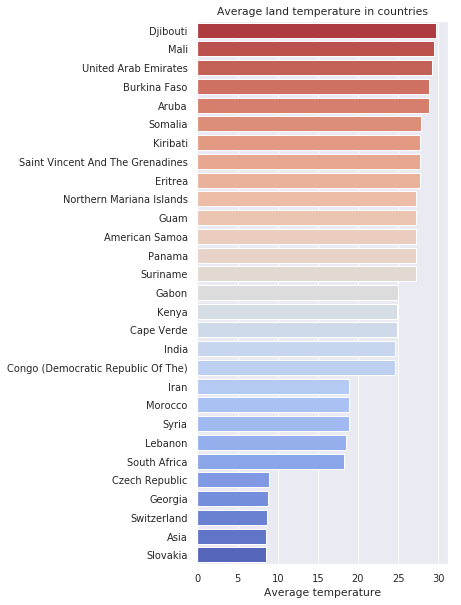

In [46]:
int_range = widgets.IntSlider(
    value=0,
    min=0,
    max=270,
    step=30,
)
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        clear_output(wait=True)
        plot_vertical_bar_chart(surface_temp_by_year_and_country, 1913+change['new'])

int_range.observe(on_value_change, names='value')

In [47]:
global_temp = pd.read_csv("../data/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go204,434,379,220
2	China	136,907,649,923
3	Japan	48,196,561,474
4	Germany	47,075,926,668
5	United Kingdom	28,945,157,161
6	Russian Federation	27,786,518,460
7	India	27,073,621,325
8	France	23,719,557,803
9	Canada	21,519,703,849
10	Italy	21,386,185,806
11	Korea, Republic of	14,874,749,722
12	Poland	14,730,227,458
13	Mexico	14,570,826,757
14	Netherlands	12,613,584,987
15	Spain	12,436,794,178
16	Australia	11,257,475,091
17	Brazil	10,957,906,919
18	Belgium	10,245,081,544
19	Indonesia	7,858,594,773
20	Turkey	7,823,631,476
21	Thailand	5,936,971,871
22	Romania	5,669,237,924
23	Argentina	4,995,085,351
24	Malaysia	4,994,838,444
25	Korea, Democratic People's Republic of	4,840,948,119
26	Sweden	4,692,829,038
27	Venezuela, Bolivarian Republic of	4,291,559,048
28	Austria	4,149,555,663
29	Kazakhstan	3,688,558,150
30	Denmark	3,637,089,396
31	United Arab Emirates	3,415,727,358
32	Switzerland	3,397,603,016
33	Greece	3,339,386,231
34	Pakistan	2,993,330,050
35	Singapore	2,967,582,418
36	Philippines	2,887,632,260
37	Czech Republic	2,883,198,684
38	Norway	2,751,846,328
39	Viet Nam	2,744,668,417
40	Portugal	2,467,626,564
41	Colombia	2,286,483,315
42	Nigeria	2,067,773,547
43	Israel	2,051,273,641
44	Chile	2,031,522,345
45	Uzbekistan	1,922,368,997
46	Ireland	1,831,116,871
47	Belarus	1,437,949,290
48	Cuba	1,335,854,570
49	Syrian Arab Republic	1,333,089,586
50	New Zealand	1,303,061,248
51	Bangladesh	1,274,570,714
52	Peru	1,268,885,233
53	Slovakia	1,175,782,205
54	Libyan Arab Jamahiriya	1,031,175,773
55	Qatar	979,015,118
56	Luxembourg	963,602,512
57	Kuwait	952,218,249
58	Tunisia	809,158,274
59	Oman	747,347,502
60	Lebanon	717,382,686
61	Bahrain	640,651,520
62	Sri Lanka	617,238,077
63	Jordan	598,183,917
64	Croatia	577,937,026
65	Serbia and Montenegro	574,177,115
66	Dominican Republic	572,302,866
67	Slovenia	567,561,311
68	Zimbabwe	551,750,290
69	Lithuania	512,169,966
70	Yemen	491,435,110
71	Saudi Arabia	471,833,010
72	Azerbaijan	465,888,908
73	Iran, Islamic Republic of	458,988,078
74	Angola	457,685,112
75	Estonia	428,805,347
76	Kenya	425,530,520
77	Serbia	417,993,613
78	Ghana	405,156,375
79	Bosnia and Herzegovina	359,780,732
80	South Africa	351,871,800
81	Costa Rica	338,989,093
82	Côte d'Ivoire	332,346,966
83	Myanmar	326,159,287
84	Bolivia	321,394,989
85	Panama	304,448,763
86	El Salvador	299,026,972
87	Sudan (former)	294,299,438
88	Latvia	269,711,098
89	Congo, Democratic Republic of	254,457,335
90	Albania	244,562,024
91	Tanzania, United Republic of	239,044,539
92	Bahamas	238,258,470
93	Zambia	223,598,061
94	Macedonia TFYR	222,828,351
95	Cameroon	207,206,483
96	Ukraine	204,992,234
97	Moldova	201,083,106
98	Mozambique	198,956,723
99	Paraguay	196,806,875
100	Nepal	174,470,041
101	Nicaragua	173,159,697
102	Ethiopia	169,186,657
103	Afghanistan	156,475,631
104	Brunei Darussalam	147,428,033
105	Malta	147,149,394
106	Algeria	126,406,310
107	Iraq	121,834,721
108	Benin	121,408,627
109	Uganda	114,584,092
110	Armenia	102,004,955
111	Madagascar	97,845,367
112	Guinea	94,903,690
113	Mali	93,632,153
114	Guadeloupe	92,772,943
115	Guyana	90,262,432
116	Togo	87,406,289
117	Georgia	86,704,178
118	Congo	81,008,122
119	Hungary	75,754,092
120	Haiti	72,148,796
121	Burkina Faso	71,516,038
122	Malawi	69,348,212
123	Finland	68,889,491
124	Morocco	68,222,297
125	Niger	66,903,736
126	Fiji	64,340,250
127	Barbados	63,665,831
128	Lesotho	63,645,433
129	Liberia	58,429,787
130	Lao People's Democratic Republic	55,017,322
131	Equatorial Guinea	50,675,094
132	Bulgaria	50,218,727
133	Turkmenistan	47,260,447
134	Sudan	46,753,835
135	Ecuador	44,876,955
136	Sierra Leone	40,195,413
137	Somalia	40,045,308
138	Montenegro	33,704,355
139	Suriname	33,298,363
140	Trinidad and Tobago	30,556,085
141	Rwanda	29,799,244
142	Mongolia	27,829,839
143	Guatemala	23,903,154
144	Gambia	23,121,574
145	Chad	21,022,536
146	Bhutan	20,276,052
147	Saint Lucia	18,312,735
148	Burundi	17,808,680
149	Central African Republic	14,619,496
150	Kyrgyzstan	11,284,460
151	Uruguay	10,541,708
152	Senegal	10,026,771
153	Guinea-Bissau	10,018,832
154	Eritrea	9,971,668
155	Botswana	8,920,553
156	Jamaica	8,677,838
157	Namibia	8,495,564
158	Papua New Guinea	6,808,655
159	Mauritania	4,528,955
160	South Sudan	4,012,412
161	Gabon	3,900,795
162	Tajikistan	3,301,032
163	Swaziland	2,375,566
164	Belize	1,719,736
165	French Guiana	1,030,455
166	French Polynesia	1,008,145
167	Djibouti	912,550
168	Timor-Leste	322,778
169	Grenada	0
170	Ethiopia PDR	0
171	Bermuda	0
172	Vanuatu	0
173	USSR	0
174	Martinique	0
175	Aruba	0
176	Antigua and Barbuda	0
177	Yugoslav SFR	0
178	Kiribati	0
179	Mauritius	0
180	Cook Islands	0
181	Micronesia, Federated States of	0
182	Egypt	0
183	Samoa	0
184	Tonga	0
185	Montserrat	0
186	Honduras	0
187	Sao Tome and Principe	0
188	Cabo Verde	0
189	Cambodia	0
190	Cayman Islands	0
191	Dominica	0
192	Czechoslovakia	0
193	Cyprus	0
194	Comoros	0
195	Réunion	0.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)